In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       4883 non-null   object 
 1   Title              4883 non-null   object 
 2   Overview           4883 non-null   object 
 3   Popularity         4883 non-null   float64
 4   Vote_Count         4883 non-null   int64  
 5   Vote_Average       4883 non-null   float64
 6   Original_Language  4882 non-null   object 
 7   Genre              4882 non-null   object 
 8   Poster_Url         4882 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 343.5+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,4883.000000,4883.000000,4883.000000
mean,64.434250,2237.435593,6.528118
std,150.655624,3422.275082,1.138285
min,21.277000,0.000000,0.000000
25%,26.123000,201.500000,6.000000
50%,35.325000,902.000000,6.600000
75%,57.725500,2807.500000,7.200000
max,5083.954000,31077.000000,9.100000


In [6]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [8]:
df.duplicated().sum()


0

In [9]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,1
Genre,1
Poster_Url,1




*   Exploration Summary



*  we have data frame consisting of 9827 rows and 9 columns
*  our dataset looks a bit tidy with no NaNs nor duplicated values
*   Release_Date column needs to be casted into date time and to extract only the year value.
*   Overview, original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them
*   there is noticable outliers in Popularity column
*   Vote_Average better be categorised for proper analysis
*   Genre column has comma saperated values and white spaces that need to be handled and casted into category.














In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes


dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [13]:
# Dropping the Column

cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


 ## Categorizing the Vot-Average column
 we would cut the vote_average and make 4 categories:
 1. Popular
 2. Average
 3. Below_avg
 4. not_popular,
  to describe it more using catigorize_col() function provided above.

In [15]:
def categorize_col(df, col, labels):

  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
  return df


In [16]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [17]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
below_avg,1248
not_popular,1199
popular,1195
average,1188


In [18]:
df.dropna(inplace=True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [19]:
# Splitting the Genre into list

df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [20]:
#Casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  13176 non-null  int32   
 1   Title         13176 non-null  object  
 2   Popularity    13176 non-null  float64 
 3   Vote_Count    13176 non-null  int64   
 4   Vote_Average  13176 non-null  category
 5   Genre         13176 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 387.0+ KB


In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [23]:
df.nunique()

,0
Release_Date,83
Title,4714
Popularity,4568
Vote_Count,2757
Vote_Average,4
Genre,19


## Data Visualizatin

In [24]:
sns.set_style('whitegrid')

## # What is the most frequent genre of movie released on Netflix?

In [25]:
df['Genre'].describe()

,Genre
count,13176
unique,19
top,Action
freq,1579


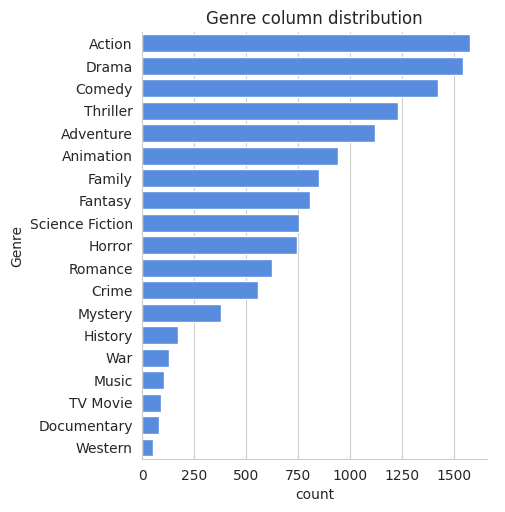

In [27]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5' )
plt.title('Genre column distribution')
plt.show()

## Which has hifhest votes in vote avg column

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


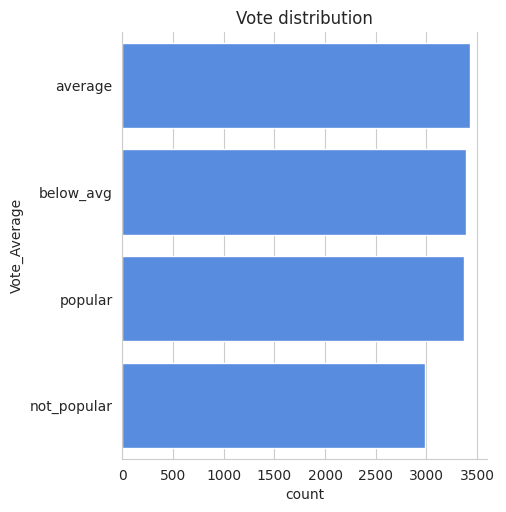

In [31]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('Vote distribution')
plt.show()

#3 What move got the highest popularity? What's its genre?

In [32]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [34]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## What movie got the lowest popularity? what's its genre

In [35]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
13174,2016,Bad Sister,21.278,178,average,Thriller
13175,2016,Bad Sister,21.278,178,average,TV Movie


## Which year has the most filmmed movies?

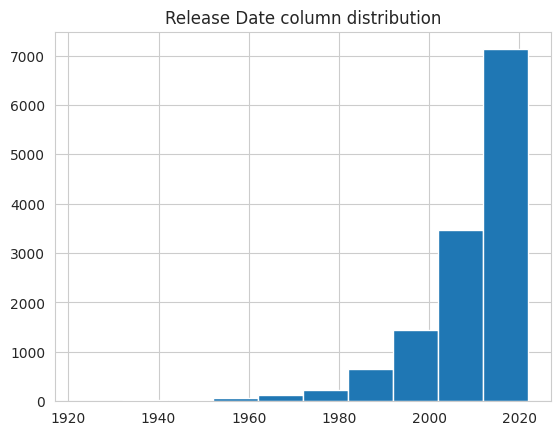

In [37]:
df['Release_Date'].hist()
plt.title("Release Date column distribution")
plt.show()

Conclusion:

Q1: What is the most frequent genre in the dataset?  

Action genre is the most frequent genre in our dataset and has appeared more than 14% of the time among 19 other genres.

Q2: What genre has the highest votes?

we have 25.5% of our dataset with popular vote. Action gets the highest

Q3: What movie got the highest popularity? What's its genre?

Spider-man: No Way home has the highest popularity

Q4: What movie got the lowest popularity? What's its genre?

The united states, thread has the lowest rate in our dataset

Q5: Whuch year has the most flimmed movies?

year 2020 has the highest fliming rate in our dataset